In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, mean_squared_error
from sklearn.impute import KNNImputer

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Kaliningrad_weather_19102020_15102011.csv', encoding = "windows-1251",  sep=";")

In [ ]:
df['DD_binary']=0
for k in range(0, len(df['DD'])):
  if df['DD'].iloc[k]=='Ветер':
    df['DD_binary'].iloc[k]=1

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df=df[['LocalTime', 'T']]

In [ ]:
df=df.dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler=MinMaxScaler()

df_norm=df['T'].values
df_norm=MinMaxScaler.fit_transform(df_norm.reshape(-1,1))
df_norm=df_norm.flatten()

In [ ]:
window = 35

def get_XY(data, window):

  Y_index = np.arange(window, len(data), window)
  Y = data[Y_index]
  rows_x = len(Y)

  X = data[range(window*rows_x)]
  X = np.reshape(X,(rows_x, window,1))

  return X,Y

X, y = get_XY(df_norm, window)

print(X.shape, y.shape)

(750, 35, 1) (750,)


In [ ]:
X_train = X[:400,:]
X_val = X[400:500,:]
X_test = X[500:,:]

y_train = y[:400]
y_val = y[400:500]
y_test = y[500:]

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,SimpleRNN

model = Sequential()
model.add(SimpleRNN(2,activation='relu',input_shape=(window,1)))
model.add(Dense(1,activation='linear'))

model.compile(optimizer='adam',loss='mse',metrics='mae')

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_7 (SimpleRNN)    (None, 2)                 8         
                                                                 
 dense_7 (Dense)             (None, 1)                 3         
                                                                 
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 100
batch_size=20

In [ ]:
history = model.fit(X_train,y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val,y_val))

Epoch 1/100
20/20 [==============================] - 1s 17ms/step - loss: 123.5871 - mae: 10.6992 - val_loss: 60.6487 - val_mae: 7.6239
Epoch 2/100
20/20 [==============================] - 0s 6ms/step - loss: 47.4801 - mae: 6.6666 - val_loss: 31.2621 - val_mae: 5.4612
Epoch 3/100
20/20 [==============================] - 0s 7ms/step - loss: 28.3325 - mae: 5.1472 - val_loss: 21.1985 - val_mae: 4.4882
Epoch 4/100
20/20 [==============================] - 0s 7ms/step - loss: 20.4630 - mae: 4.3705 - val_loss: 16.1395 - val_mae: 3.9090
Epoch 5/100
20/20 [==============================] - 0s 6ms/step - loss: 16.0461 - mae: 3.8642 - val_loss: 12.9686 - val_mae: 3.4977
Epoch 6/100
20/20 [==============================] - 0s 6ms/step - loss: 13.1423 - mae: 3.4878 - val_loss: 10.6974 - val_mae: 3.1708
Epoch 7/100
20/20 [==============================] - 0s 7ms/step - loss: 10.9940 - mae: 3.1851 - val_loss: 9.0436 - val_mae: 2.9102
Epoch 8/100
20/20 [==============================] - 0s 7ms/step - 

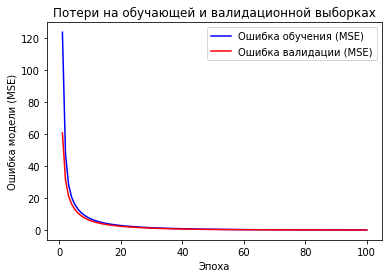

In [ ]:
loss_function = history.history['loss']
val_loss_function = history.history['val_loss']
epochs = range(1,len(loss_function)+1)

plt.title('Потери на обучающей и валидационной выборках')
plt.plot(epochs,loss_function,color='blue',label='Ошибка обучения (MSE)')
plt.plot(epochs,val_loss_function,color='red',label='Ошибка валидации (MSE)')
plt.xlabel('Эпоха')
plt.ylabel('Ошибка модели (MSE)')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score,mean_absolute_error

y_pred = model.predict(X_test)
y_pred_inv = MinMaxScaler.inverse_transform(y_pred)
y_test_inv = MinMaxScaler.inverse_transform(y_test.reshape(-1,1))

print(f'R2 Score (Test) = {round(r2_score(y_true=y_test_inv,y_pred=y_pred_inv),3)}', f'MAE (Test) = {round(mean_absolute_error(y_true=y_test_inv, y_pred=y_pred_inv),3)}', sep='\n')

8/8 [==============================] - 0s 3ms/step
R2 Score (Test) = -1.252
MAE (Test) = 10.637
